In [1]:
using Plots

In [2]:
function time_viscous(lambda::Float64)
    """
    Arguments:
    lambda::Float64 --- Topography Wavelength (m)
    
    Returns:
    time --- Time for viscous flow (yrs)
    """
    g = 0.113
    ice_viscosity = 10^14
    delta_rho = 80
    time = (4*pi)*(ice_viscosity)*(1/g)*(1/delta_rho)*(1/lambda)
    return time/3.15e7
end

function thickening_rate(hice::Float64)
    """
    Arguments:
    hice::Float64 --- Ice shell thickness (m)
    
    Returns:
    rate --- Rate of thickening, units are (m/s)

    Info:
    1W = 1J/s
    q = -k*(T-To)/h
    """
    delta_T = 173 # Temperature (K)
    kthermal = 2.2 # Thermal conductivity (W/m*K)
    L = 334*10^3 # Latent heat of fusion (J/kg)
    rho = 1000 # Density (kg/m^3)
    q = kthermal*(delta_T/hice)
    rate = q/L/rho   
    return rate
end

function thickening_time(hice::Float64)
    """
    Arguments:
    hice::Float64 --- Ice shell thickness (m)
    
    Returns:
    time --- Time for thickening (yrs)

    Info:
    1W = 1J/s
    q = -k*(T-To)/h
    """
    rate = thickening_rate(hice)
    time = hice/rate
    return time/3.15e7
end

thickening_time (generic function with 1 method)

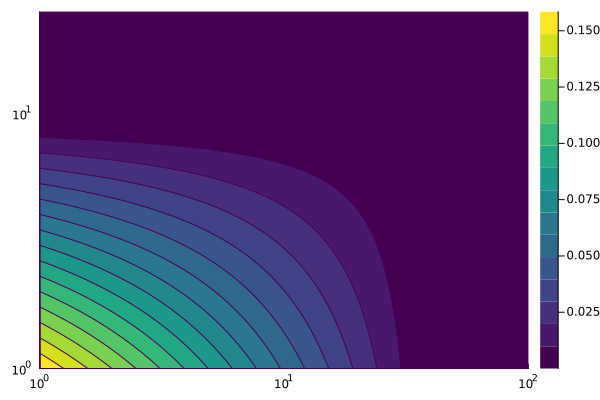

In [3]:
f(lambda,hice) = time_viscous(lambda)/thickening_time(hice)
lambda = range(1*1000,100*1000,length=4)
hice = range(1*1000,25*1000,length=4)
z = @.f(lambda',hice)
contourf(lambda/1000,hice/1000,z,color=:viridis,scale=:log10)